# Module 6 Lab

## Generalized Linear Models

In [1]:
# Load necessary libraries
import pandas as pd # for data science
import numpy as np  # linear algebra library
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # additional plotting library

### Generating Our DataFrame

To begin this lab, we are going to formulate a randomized dataset with *n*=100 observations. Let's suppose we have a class of 100 students who have taken three exams.

In [2]:
def rand_df(x, y, state):
    np.random.seed(state) # set seed for reproducibility
    # assign variable to a dataframe through the number 100
    val = pd.DataFrame(np.random.randint(x, y, size=100))
    val = val.round(decimals=0).astype(int) # no decimals, integers
    return val

In [3]:
df1 = rand_df(0, 100, 42) # exam 1
df2 = rand_df(0, 100, 23) # exam 2
df3 = rand_df(0, 100, 80) # exam 3
df4 = rand_df(0, 20, 36) # study hours

In [4]:
dfs = [df1, df2, df3, df4]
df5 = pd.concat(dfs, join='outer', axis=1)
df5.columns = ['Exam 1', 'Exam 2', 'Exam 3', 'Study_Hours']
df5['Final_Grade'] = df5[['Exam 1', 'Exam 2', 'Exam 3']].mean(axis=1)
# no decimals, integers
df5['Final_Grade'] = df5['Final_Grade'].round(decimals=0).astype(int)
df5

,Exam 1,Exam 2,Exam 3,Study_Hours,Final_Grade
0,51,83,47,5,60
1,92,40,60,2,64
2,14,73,38,8,42
3,71,54,83,1,69
4,60,31,10,12,34
...,...,...,...,...,...
95,84,81,82,15,82
96,79,32,95,7,69
97,81,53,80,11,71
98,52,35,77,6,55


## Basic Scatterplots

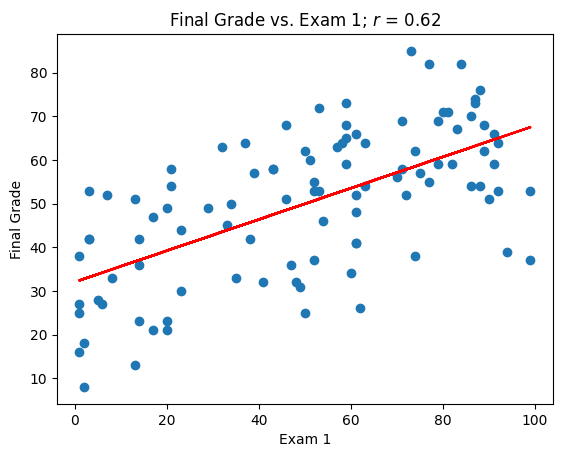

In [5]:
x = df5['Exam 1']
y = df5['Final_Grade']
plt.title('Final Grade vs. Exam 1')
plt.xlabel('Exam 1')
plt.ylabel('Final Grade')

# create best-fit line based on slope-intercept form
m, b = np.polyfit(x, y, 1)
plt.scatter(x, y)
plt.plot(x, m*x+b, color = 'red')

# correlation coefficient
corr = round(np.corrcoef(x, y)[0,1],2)
plt.title('Final Grade vs. Exam 1;' ' $\mathit{r}$ = ' + "{:.2f}".format(corr))
plt.show()

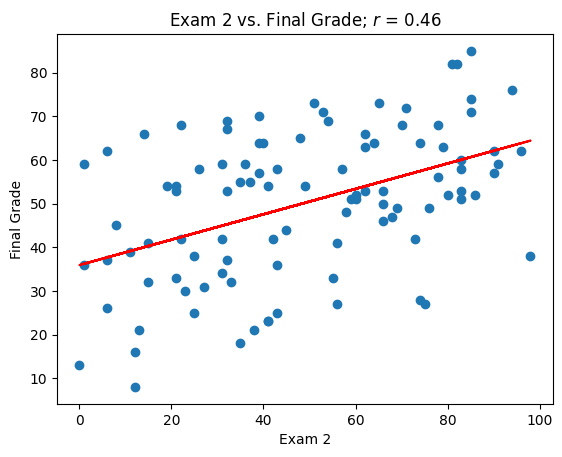

In [6]:
x = df5['Exam 2']
y = df5['Final_Grade']
plt.title('Exam 2 vs. Final Grade')
plt.xlabel('Exam 2')
plt.ylabel('Final Grade')

# create best-fit line based on slope-intercept form
m, b = np.polyfit(x, y, 1)
plt.scatter(x, y)
plt.plot(x, m*x+b, color = 'red')
corr = round(np.corrcoef(x, y)[0,1],2)
plt.title('Exam 2 vs. Final Grade;' ' $\mathit{r}$ = ' + "{:.2f}".format(corr))
plt.show()

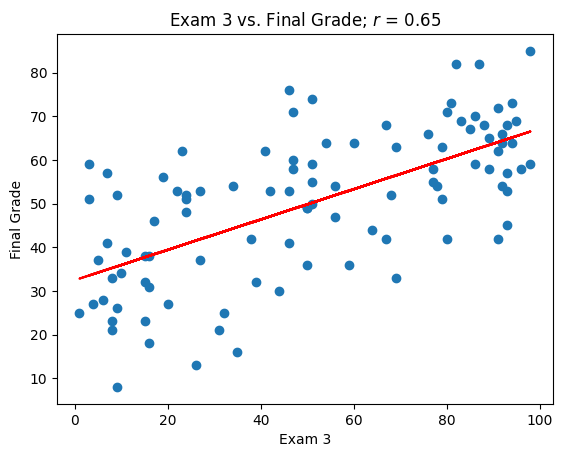

In [7]:
x = df5['Exam 3']
y = df5['Final_Grade']
plt.title('Exam 3 vs. Final Grade')
plt.xlabel('Exam 3')
plt.ylabel('Final Grade')

# create best-fit line based on slope-intercept form
m, b = np.polyfit(x, y, 1)
plt.scatter(x, y)
plt.plot(x, m*x+b, color = 'red')
corr = round(np.corrcoef(x, y)[0,1],2)
plt.title('Exam 3 vs. Final Grade;' ' $\mathit{r}$ = ' + "{:.2f}".format(corr))
plt.show()

In [ ]:
x = df5['Study_Hours']
y = df5['Final_Grade']
plt.title('Exam 3 vs. Final Grade')
plt.xlabel('Study_Hours')
plt.ylabel('Final Grade')

# create best-fit line based on slope-intercept form
m, b = np.polyfit(x, y, 1)
plt.scatter(x, y)
plt.plot(x, m*x+b, color = 'red')
corr = round(np.corrcoef(x, y)[0,1],2)
plt.title('Study Hours vs. Final Grade;' ' $\mathit{r}$ = ' +
          "{:.2f}".format(corr))
plt.show()

### Scatterplots in a Loop

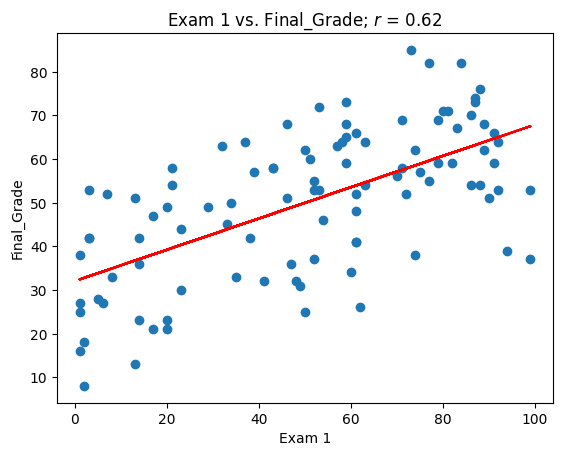

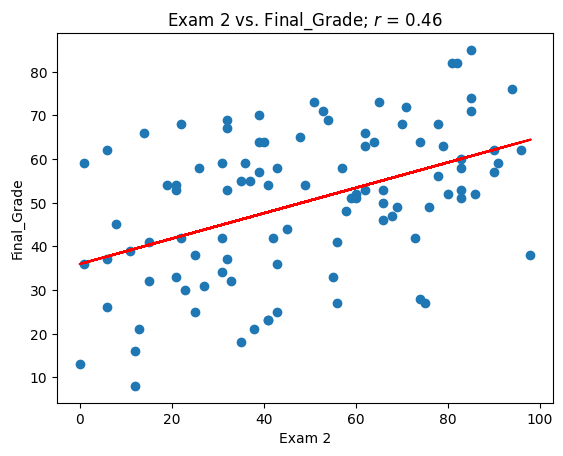

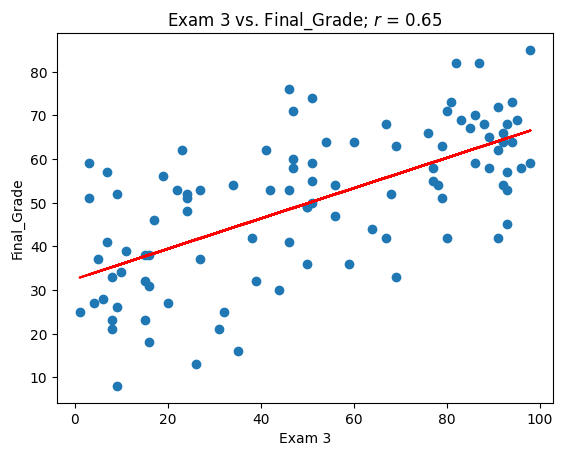

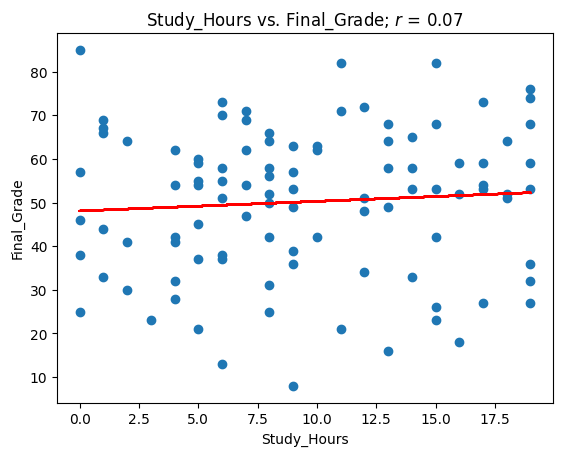

In [8]:
y_col = 'Final_Grade'
x_columns = ['Exam 1', 'Exam 2', 'Exam 3', 'Study_Hours']

for x_col in x_columns:
    figure = plt.figure()
    ax = plt.gca()
    m, b = np.polyfit(df5[x_col], df5[y_col], 1)
    plt.plot(df5[x_col], m*df5[x_col]+b, color = 'red')
    ax.scatter(df5[x_col], df5[y_col])
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    corr = round(np.corrcoef(df5[x_col], df5[y_col])[0,1],2)
    ax.set_title('{} vs. {};'.format(x_col, y_col)
                 + ' $\mathit{r}$ = '
                 + '{:.2f}'.format(corr))
    plt.show()

## Linear Regression

$y = b_{0} + b_{1}x_{1} + b_{2}x_{2} + ... + b_{n}x_{n} + \varepsilon$

### Simple Linear Regression

* Univariate analysis  
$y = b_{0} + b_{1}x_{1} + \varepsilon$

In [9]:
# univariate analysis
X1 = df5['Exam 1']
y = df5['Final_Grade']

import statsmodels.api as sm # use stats models for basic linear regression
X1 = sm.add_constant(X1) # adds constant to the model
model = sm.OLS(y, X1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Final_Grade   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     62.25
Date:                Fri, 11 Oct 2024   Prob (F-statistic):           4.35e-12
Time:                        04:54:23   Log-Likelihood:                -399.61
No. Observations:                 100   AIC:                             803.2
Df Residuals:                      98   BIC:                             808.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.0540      2.652     12.087      0.000      26.791      37.317
Exam 1         0.3583      0.045      7.890      0.000       0.268       0.448
==============================================================================
Omnibus:                        5.483   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.064   Jarque-Bera (JB):                3.430
Skew:                          -0.272   Prob(JB):                        0.180
Kurtosis:                       2.274   Cond. No.                         117.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$y = 32.05 + 0.36 \text{ (Exam 1)} + \varepsilon$

### Multiple Linear Regression

**For the following exercises, we will work with the `Facebook metrics` dataset $^1$**  

https://archive.ics.uci.edu/ml/datasets/Facebook+metrics

In [11]:


import pandas as pd
# Download the dataset from the UCI Machine Learning Repository
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00368/Facebook_metrics.zip

# Unzip the file
!unzip Facebook_metrics.zip

# Load the dataset into a Pandas DataFrame
facebook_df = pd.read_csv('dataset_Facebook.csv', sep=';')

# Print the first few rows of the dataframe
facebook_df.head()


--2024-10-11 04:59:17--  https://archive.ics.uci.edu/ml/machine-learning-databases/00368/Facebook_metrics.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘Facebook_metrics.zip’

Facebook_metrics.zi     [ <=>                ]  15.90K  --.-KB/s    in 0.007s  

2024-10-11 04:59:17 (2.14 MB/s) - ‘Facebook_metrics.zip’ saved [16281]

Archive:  Facebook_metrics.zip
  inflating: dataset_Facebook.csv    
  inflating: Facebook_metrics.txt    


,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [12]:
import statsmodels.api as sm
facebook = facebook_df.copy()

In [13]:
facebook.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


**Let's leverage the data to run a linear regression model that predicts the `Total Interactions` (dependent variable ) based on the other columns of data (independent variables $x_1, x_2, x_3, \cdots x_{n}$).**

In [14]:
# we cannot have non-encoded categorical features in a linear regression model
# since the model only relies on numerical data

facebook['Type'].value_counts() # let's inspect the 'Type' column

,count
Type,
Photo,426
Status,45
Link,22
Video,7


In [15]:
facebook_enc = pd.get_dummies(facebook, columns = ['Type'])
facebook_enc.head()

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,...,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions,Type_Link,Type_Photo,Type_Status,Type_Video
0,139441,2,12,4,3,0.0,2752,5091,178,109,...,1640,119,4,79.0,17.0,100,False,True,False,False
1,139441,2,12,3,10,0.0,10460,19057,1457,1361,...,6112,1108,5,130.0,29.0,164,False,False,True,False
2,139441,3,12,3,3,0.0,2413,4373,177,113,...,1503,132,0,66.0,14.0,80,False,True,False,False
3,139441,2,12,2,10,1.0,50128,87991,2211,790,...,32048,1386,58,1572.0,147.0,1777,False,True,False,False
4,139441,2,12,2,3,0.0,7244,13594,671,410,...,3200,396,19,325.0,49.0,393,False,True,False,False


In [16]:
facebook_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 22 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Page total likes                                                     500 non-null    int64  
 1   Category                                                             500 non-null    int64  
 2   Post Month                                                           500 non-null    int64  
 3   Post Weekday                                                         500 non-null    int64  
 4   Post Hour                                                            500 non-null    int64  
 5   Paid                                                                 499 non-null    float64
 6   Lifetime Post Total Reach                                            500 non-null    int64  
 7   Lifetime

In [17]:
nulls = pd.DataFrame(facebook_enc.isnull().sum(), columns=['Nulls'])
nulls = nulls[nulls['Nulls']>0]
nulls

,Nulls
Paid,1
like,1
share,4


In [18]:
# impute the missing values with mean since few of them
facebook_enc['Paid'].fillna((facebook_enc)['Paid'].mean(), inplace=True)
facebook_enc['like'].fillna((facebook_enc)['like'].mean(), inplace=True)
facebook_enc['share'].fillna((facebook_enc)['share'].mean(), inplace=True)

<ipython-input-18-075700ebfa09>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  facebook_enc['Paid'].fillna((facebook_enc)['Paid'].mean(), inplace=True)
<ipython-input-18-075700ebfa09>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

In [24]:
# assign independent variables, dependent variable, respectively
x = facebook_enc.loc[:, facebook_enc.columns != 'Total Interactions']
# define the target
y = pd.DataFrame(facebook_enc['Total Interactions'])

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,
                                                    random_state=42)

In [25]:
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
model.summary()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [26]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# ... (your existing code for data loading, preprocessing, etc.) ...

# Before fitting the model, ensure all columns in X_train and y_train are numeric
X_train = X_train.select_dtypes(include=['number']) # Select only numeric columns
y_train = y_train.select_dtypes(include=['number']) # Select only numeric columns

# Now add the constant and fit the model
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Total Interactions   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 3.132e+04
Date:                Fri, 11 Oct 2024   Prob (F-statistic):               0.00
Time:                        05:01:09   Log-Likelihood:                -1327.1
No. Observations:                 350   AIC:                             2690.
Df Residuals:                     332   BIC:                             2760.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================================
                                                                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------
const                                                                  -0.9122     10.617     -0.086      0.932     -21.798      19.974
Page total likes                                                     1.105e-05      0.000      0.097      0.923      -0.000       0.000
Category                                                                1.1781      0.813      1.450      0.148      -0.420       2.776
Post Month                                                             -0.3250      0.574     -0.567      0.571      -1.454       0.804
Post Weekday                                                           -0.3938      0.300     -1.313      0.190      -0.984       0.196
Post Hour                                                              -0.0537      0.146     -0.367      0.714      -0.342       0.234
Paid                                                                    0.9746      1.317      0.740      0.460      -1.616       3.565
Lifetime Post Total Reach                                           -3.056e-05      0.000     -0.272      0.786      -0.000       0.000
Lifetime Post Total Impressions                                      7.806e-06   3.95e-05      0.198      0.843   -6.99e-05    8.55e-05
Lifetime Engaged Users                                                  0.0707      0.017      4.080      0.000       0.037       0.105
Lifetime Post Consumers                                                -0.0714      0.017     -4.103      0.000      -0.106      -0.037
Lifetime Post Consumptions                                              0.0005      0.001      0.860      0.390      -0.001       0.002
Lifetime Post Impressions by people who have liked your Page        -6.423e-06   4.96e-05     -0.130      0.897      -0.000    9.11e-05
Lifetime Post reach by people who like your Page                     7.053e-05      0.000      0.279      0.781      -0.000       0.001
Lifetime People who have liked your Page and engaged with your post     0.0039      0.002      1.596      0.111      -0.001       0.009
comment                                                                 1.1062      0.059     18.698      0.000       0.990       1.223
like                                                                    0.9308      0.017     55.162      0.000       0.898       0.964
share                                                                   1.0311      0.042     24.636      0.000       0.949       1.113
==============================================================================
Omnibus:                      765.020   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          11

### Multiple Linear Regression with Scikit-Learn

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,
                                                    random_state=42)

In [ ]:
sk_model = LinearRegression()

In [ ]:
sk_model.fit(x_train, y_train)

In [ ]:
print('Model Coefficients:', sk_model.coef_)
print()
print('Intercept:', sk_model.intercept_)
coef = pd.DataFrame(sk_model.coef_.T, columns=['Coefficients'])
cols = pd.DataFrame(x.columns, columns=['Columns'])
joined = pd.concat([cols['Columns'], coef['Coefficients']], axis=1)
joined

In [ ]:
predictions = sk_model.predict(x_test)
pd.DataFrame(predictions, columns=['Predictions'])

In [ ]:
plt.scatter(y_test, predictions)
plt.title('Predictions vs. Actual')
plt.xlabel('Actual')
plt.ylabel('Predictions')
plt.show()

----------------


$^{1}$ Moro, S., Rita, P., & Vala B. (2016). Predicting social media performance metrics and evaluation
   of the impact on brand building: A data mining approach. *Journal of Business Research, Elsevier,* 3341–3351.  
   https://doi.org/10.1016/j.jbusres.2016.02.010
   
